#### Determine number of observations for a peptide. 

In [1]:
# TODO: 
# - get modified residues from PeptideAtlas and score with number of observations etc.

In [2]:
# Autoreload 
%load_ext autoreload
%autoreload 2
import pandas as pd 
import numpy as np

from pathlib import Path
from typing import Union, List, Tuple, Dict, Optional



In [3]:
DATA_DIR = Path("./data") 

uniprot_id = "Q99460" 
sequence = """MITSAAGIISLLDEDEPQLKEFALHKLNAVVNDFWAEISESVDKIEVLYEDEGFRSRQFAALVASKVFYHLGAFEESLNYALGAGDLFNVNDNSEYVETI
IAKCIDHYTKQCVENADLPEGEKKPIDQRLEGIVNKMFQRCLDDHKYKQAIGIALETRRLDVFEKTILESNDVPGMLAYSLKLCMSLMQNKQFRNKVLRV
LVKIYMNLEKPDFINVCQCLIFLDDPQAVSDILEKLVKEDNLLMAYQICFDLYESASQQFLSSVIQNLRTVGTPIASVPGSTNTGTVPGSEKDSDSMETE
EKTSSAFVGKTPEASPEPKDQTLKMIKILSGEMAIELHLQFLIRNNNTDLMILKNTKDAVRNSVCHTATVIANSFMHCGTTSDQFLRDNLEWLARATNWA
KFTATASLGVIHKGHEKEALQLMATYLPKDTSPGSAYQEGGGLYALGLIHANHGGDIIDYLLNQLKNASNDIVRHGGSLGLGLAAMGTARQDVYDLLKTN
LYQDDAVTGEAAGLALGLVMLGSKNAQAIEDMVGYAQETQHEKILRGLAVGIALVMYGRMEEADALIESLCRDKDPILRRSGMYTVAMAYCGSGNNKAIR
RLLHVAVSDVNDDVRRAAVESLGFILFRTPEQCPSVVSLLSESYNPHVRYGAAMALGICCAGTGNKEAINLLEPMTNDPVNYVRQGALIASALIMIQQTE
ITCPKVNQFRQLYSKVINDKHDDVMAKFGAILAQGILDAGGHNVTISLQSRTGHTHMPSVVGVLVFTQFWFWFPLSHFLSLAYTPTCVIGLNKDLKMPKV
QYKSNCKPSTFAYPAPLEVPKEKEKEKVSTAVLSITAKAKKKEKEKEKKEEEKMEVDEAEKKEEKEKKKEPEPNFQLLDNPARVMPAQLKVLTMPETCRY
QPFKPLSIGGIIILKDTSEDIEELVEPVAAHGPKIEEEEQEPEPPEPFEYIDD""".replace("\n", "")


fp = DATA_DIR / f"{uniprot_id}.tsv" 
df = pd.read_csv(fp, sep="\t")
cols = [
    "accession", 
    "start",
    "length", 
    "pre_aa",
    "sequence",
    "fol_aa",
    "ess", # Score derived from peptide probability, EOS, and sequence characteristics such as missed cleavage(MC) or semi-tryptic(NTT); these are annotated in red.
    "net", 
    "best_prob",
    "n_obs", # Total number of observations in all modified forms and charge states
    "eos",
    "ssrt",
    "n_prot_map",
    "n_gen_loc",
    "n_experiments",
    "subpep_of",
    "is_unique",

]

# Only get first 17 columns.
df = df.iloc[:, 0:len(cols)]
df.columns = cols

df

,accession,start,length,pre_aa,sequence,fol_aa,ess,net,best_prob,n_obs,eos,ssrt,n_prot_map,n_gen_loc,n_experiments,subpep_of,is_unique
0,PAp00074750,1,20,-,MITSAAGIISLLDEDEPQLK,E,0.93,2,1.0,11700,0.88,50.95,20,1,684,8,C
1,PAp00065502,916,19,K,DTSEDIEELVEPVAAHGPK,L,0.90,2,1.0,12606,0.73,31.34,9,1,878,11,C
2,PAp00380980,828,11,K,VSTAVLSITAK,A,0.89,2,1.0,8647,1.00,24.20,12,1,860,14,C
3,PAp00498903,525,19,K,NAQAIEDMVGYAQETQHEK,L,0.87,2,1.0,12864,0.60,27.43,18,1,862,8,C
4,PAp00152579,617,12,R,AAVESLGFILFR,T,0.82,2,1.0,11494,0.58,45.25,16,1,861,5,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,PAp08576858,827,11,E,KVSTAVLSITA,K,0.03 [mgl],2,1.0,2,0.00,25.79,11,2,2,12,C
1105,PAp06649198,827,19,E,KVSTAVLSITAKAKKKEKE,K,"0.02 [mc,mgl]",2,1.0,23,0.00,22.68,10,2,2,2,C
1106,PAp07110555,827,21,E,KVSTAVLSITAKAKKKEKEKE,K,"0.02 [mc,mgl]",2,1.0,7,0.00,21.80,10,2,2,0,Y
1107,PAp10192079,827,13,E,KVSTAVLSITAKA,K,"0.02 [mc,mgl]",2,1.0,1,0.00,27.43,11,2,1,7,C


In [4]:
df["uniprot_seq"] = df.apply(
        lambda x: sequence[x["start"]-1:x["start"]-1+len(x["sequence"])],
        axis=1,
    )
df["seq_match"] = df.apply(
    lambda x: x["sequence"] == x["uniprot_seq"],
    axis=1,
)
df = df[["accession", "start", "length", "sequence", "uniprot_seq", "n_experiments", "seq_match"]]
df

,accession,start,length,sequence,uniprot_seq,n_experiments,seq_match
0,PAp00074750,1,20,MITSAAGIISLLDEDEPQLK,MITSAAGIISLLDEDEPQLK,684,True
1,PAp00065502,916,19,DTSEDIEELVEPVAAHGPK,DTSEDIEELVEPVAAHGPK,878,True
2,PAp00380980,828,11,VSTAVLSITAK,VSTAVLSITAK,860,True
3,PAp00498903,525,19,NAQAIEDMVGYAQETQHEK,NAQAIEDMVGYAQETQHEK,862,True
4,PAp00152579,617,12,AAVESLGFILFR,AAVESLGFILFR,861,True
...,...,...,...,...,...,...,...
1104,PAp08576858,827,11,KVSTAVLSITA,KVSTAVLSITA,2,True
1105,PAp06649198,827,19,KVSTAVLSITAKAKKKEKE,KVSTAVLSITAKAKKKEKE,2,True
1106,PAp07110555,827,21,KVSTAVLSITAKAKKKEKEKE,KVSTAVLSITAKAKKKEKEKE,2,True
1107,PAp10192079,827,13,KVSTAVLSITAKA,KVSTAVLSITAKA,1,True


In [13]:
len(sequence)

953

In [11]:
# Filter for peptides that have >10 n_experiments 

df[df.n_experiments > 10]

,accession,start,length,sequence,uniprot_seq,n_experiments,seq_match
0,PAp00074750,1,20,MITSAAGIISLLDEDEPQLK,MITSAAGIISLLDEDEPQLK,684,True
1,PAp00065502,916,19,DTSEDIEELVEPVAAHGPK,DTSEDIEELVEPVAAHGPK,878,True
2,PAp00380980,828,11,VSTAVLSITAK,VSTAVLSITAK,860,True
3,PAp00498903,525,19,NAQAIEDMVGYAQETQHEK,NAQAIEDMVGYAQETQHEK,862,True
4,PAp00152579,617,12,AAVESLGFILFR,AAVESLGFILFR,861,True
...,...,...,...,...,...,...,...
916,PAp01875096,310,10,KTPEASPEPK,KTPEASPEPK,26,True
917,PAp00903313,276,27,ASVPGSTNTGTVPGSEKDSDSMETEEK,ASVPGSTNTGTVPGSEKDSDSMETEEK,27,True
919,PAp03162685,603,14,LHVAVSDVNDDVRR,LHVAVSDVNDDVRR,13,True
920,PAp04811385,808,16,PSTFAYPAPLEVPKEK,PSTFAYPAPLEVPKEK,11,True


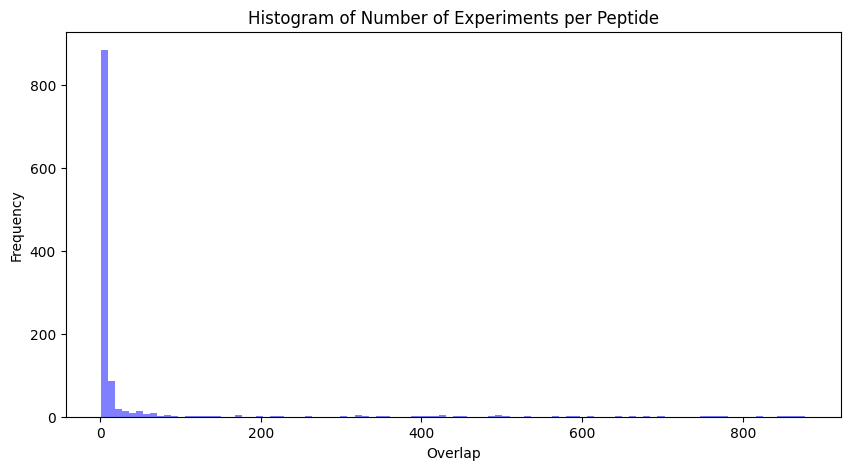

In [10]:
# Plot dataframe as histogram 
# Input: dataframe
# Output: histogram
import matplotlib.pyplot as plt

def plot_hist(df):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111)
    ax.hist(df['n_experiments'], bins=100, color='blue', alpha=0.5)
    ax.set_xlabel('Overlap')
    ax.set_ylabel('Frequency')
    ax.set_title('Histogram of Number of Experiments per Peptide')
    plt.show()

plot_hist(df)

In [34]:
df[df.seq_match == False]

,accession,start,length,sequence,uniprot_seq,n_experiments,seq_match
61,PAp05012832,650,17,YGAAMALGICCSGTGNK,YGAAMALGICCAGTGNK,12,False
104,PAp05528096,629,21,TPEQCPSIVSLLSESYNPHVR,TPEQCPSVVSLLSESYNPHVR,3,False
914,PAp03709425,934,7,KLEEEEK,KIEEEEQ,5,False


In [ ]:


def check_peptide_match(
    df: pd.DataFrame,
    sequence: str,
) -> pd.DataFrame:
    """Given a dataframe of unique peptides, check which ones map to the 
    sequence perfectly.

    Parameters
    ----------
    df : pd.DataFrame
        Dataframe of unique peptides.
    sequence : str
        Protein sequence.
    
    """

    # Create a new column for whether the peptide matches the sequence.
    # First, create a column that is `sequence` at the desired position.
    # The "start" column is 1-indexed, so subtract 1.
    df["uniprot_seq"] = df.apply(
        lambda x: sequence[x["start"]-1:x["start"]-1+len(x["sequence"])],
        axis=1,
    )


    # For each peptide in the dataframe, add the number of observations to the
    # corresponding residue in the sequence. 
    counts = np.zeros(len(sequence))
    for i, row in df.iterrows():
        # Get the sequence and start position.
        seq = row["sequence"]
        start = row["start"]
        # Ensure that the peptide matches the sequence at the specified position.
        #print(seq)
        #print(sequence[start-1:start-1+len(seq)])
        if seq == sequence[start-1:start-1+len(seq)]:
            # Add the number of observations to the corresponding residue in the sequence.
            counts[start-1:start-1+len(seq)] += row["n_obs"]
        else:
            if not exact_match_only:
                # Only increase the count for the residues that do match.
                for j in range(len(seq)):
                    if seq[j] == sequence[start-1+j]:
                        counts[start-1+j] += row["n_obs"]
    
    return counts

In [ ]:
check_peptide_match(df, sequence=sequence)

In [5]:
def annotate_peptide_observation_count(
    df: pd.DataFrame,
    sequence: str,
    exact_match_only: bool = True,
    verbose: bool = True,
) -> List[int]:
    """Given a dataframe of unique peptides, annotate the number of observations
    per residue.
    
    Ensure that the peptide matches the sequence at the specified position.

    Parameters
    ----------
    df : pd.DataFrame
        Dataframe of unique peptides.
    sequence : str
        Protein sequence.
    
    """
    # For each peptide in the dataframe, add the number of observations to the
    # corresponding residue in the sequence. 
    counts = np.zeros(len(sequence))
    for i, row in df.iterrows():
        # Get the sequence and start position.
        seq = row["sequence"]
        start = row["start"]
        # Ensure that the peptide matches the sequence at the specified position.
        #print(seq)
        #print(sequence[start-1:start-1+len(seq)])
        if seq == sequence[start-1:start-1+len(seq)]:
            # Add the number of observations to the corresponding residue in the sequence.
            counts[start-1:start-1+len(seq)] += row["n_obs"]
        else:
            if not exact_match_only:
                # Only increase the count for the residues that do match.
                for j in range(len(seq)):
                    if seq[j] == sequence[start-1+j]:
                        counts[start-1+j] += row["n_obs"]
    
    return counts

In [6]:
counts = annotate_peptide_observation_count(df, sequence, exact_match_only=True, verbose=True)

In [9]:
# plot heatmap of peptide observation counts 
# plot heatmap of peptide observation counts normalized by length of peptide

import plotly.express as px

fig = px.imshow(
    np.array([counts]),
    color_continuous_scale="Viridis",
    title=f"Per-residue observation count for {uniprot_id}",
    height=200,

    # autoscale to height
    aspect="auto",
)
fig.show()

In [12]:
# Plot trace of observation count (i.e. x-axis is residue position, y-axis is observation count)
import plotly.graph_objects as go

def show_observation_count(counts: List[int], uniprot_id: str) -> None:
    fig = go.Figure(
        go.Scatter(
            x=np.arange(len(counts)),
            y=counts,
            mode="lines",
        )
    )
    fig.update_layout(
        title=f"Per-residue observation count for {uniprot_id}",
        xaxis_title="Residue position",
        yaxis_title="Observation count",
    )
    fig.show()


In [23]:
df

,phosphosite,site_qual,protein_id,-2,-1,site,+1,+2,1_res,1_euc_dist,1_seq_dist,2_res,2_euc_dist,2_seq_dist,3_res,3_euc_dist,3_seq_dist,site_res
1244383,False,84.35,Q99460,I8,I9,S10,L11,L12,G7,5.223899,-3.0,D13,5.379432,3.0,NaN,NaN,NaN,S
1244384,False,86.29,Q99460,E37,I38,S39,E40,S41,V42,5.032899,3.0,A36,5.199779,-3.0,W35,5.905719,-4.0,S
1244385,False,84.21,Q99460,S39,E40,S41,V42,D43,I38,5.358967,-3.0,K44,5.708221,3.0,NaN,NaN,NaN,S
1244386,False,81.16,Q99460,F54,R55,S56,R57,Q58,F59,5.345183,3.0,NaN,NaN,NaN,NaN,NaN,NaN,S
1244387,False,89.10,Q99460,V63,A64,S65,K66,V67,S77,4.090029,12.0,Y80,5.010159,15.0,F68,5.117053,3.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244507,False,93.12,Q99460,V680,N681,Y682,V683,R684,Q685,4.695353,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Y
1244508,True,90.79,Q99460,Q711,L712,Y713,S714,K715,A730,4.793229,17.0,R710,5.165621,-3.0,V716,5.311297,3.0,Y
1244509,False,91.37,Q99460,L781,A782,Y783,T784,P785,I746,5.251446,-37.0,S780,5.281717,-3.0,T745,5.707674,-38.0,Y
1244510,False,86.40,Q99460,V800,Q801,Y802,K803,S804,L878,5.030559,76.0,M894,5.374636,92.0,L877,5.567443,75.0,Y


In [11]:
counts = annotate_peptide_observation_count(df, sequence, exact_match_only=True, verbose=True)
inexact = annotate_peptide_observation_count(df, sequence, exact_match_only=False, verbose=True)

show_observation_count(counts, uniprot_id)
show_observation_count(inexact, uniprot_id)

In [18]:
sum(inexact) - sum(counts)

625.0

In [19]:
# Load structure dataframe. 
from phosphosite.load_data import background_df

# Get the structure dataframe for the specified uniprot ID.
df = background_df[background_df["protein_id"] == uniprot_id]
df

Loaded 1626747 rows from 17236 proteins from /home/cim/STRUCTURAL_MOTIFS/phosphosite/data/motif/all-STY-6A2R3N-ca


,phosphosite,site_qual,protein_id,-2,-1,site,+1,+2,1_res,1_euc_dist,1_seq_dist,2_res,2_euc_dist,2_seq_dist,3_res,3_euc_dist,3_seq_dist,site_res
1244383,False,84.35,Q99460,I8,I9,S10,L11,L12,G7,5.223899,-3.0,D13,5.379432,3.0,NaN,NaN,NaN,S
1244384,False,86.29,Q99460,E37,I38,S39,E40,S41,V42,5.032899,3.0,A36,5.199779,-3.0,W35,5.905719,-4.0,S
1244385,False,84.21,Q99460,S39,E40,S41,V42,D43,I38,5.358967,-3.0,K44,5.708221,3.0,NaN,NaN,NaN,S
1244386,False,81.16,Q99460,F54,R55,S56,R57,Q58,F59,5.345183,3.0,NaN,NaN,NaN,NaN,NaN,NaN,S
1244387,False,89.10,Q99460,V63,A64,S65,K66,V67,S77,4.090029,12.0,Y80,5.010159,15.0,F68,5.117053,3.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244507,False,93.12,Q99460,V680,N681,Y682,V683,R684,Q685,4.695353,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Y
1244508,True,90.79,Q99460,Q711,L712,Y713,S714,K715,A730,4.793229,17.0,R710,5.165621,-3.0,V716,5.311297,3.0,Y
1244509,False,91.37,Q99460,L781,A782,Y783,T784,P785,I746,5.251446,-37.0,S780,5.281717,-3.0,T745,5.707674,-38.0,Y
1244510,False,86.40,Q99460,V800,Q801,Y802,K803,S804,L878,5.030559,76.0,M894,5.374636,92.0,L877,5.567443,75.0,Y


In [21]:
from phosphosite.structure import loader
from phosphosite.structure import process_structures

# Loader object returns path to structure for a given uniprot_id. 
loader.get_structure(uniprot_id)

ImportError: cannot import name 'process_structures' from 'phosphosite.structure' (/home/cim/STRUCTURAL_MOTIFS/phosphosite/phosphosite/structure/__init__.py)

In [31]:
loader.protein_id_exists(uniprot_id)

True

In [29]:
from phosphosite.structure.processing import process_af_data

process_af_data(
    directory=loader.structure_dir,
    protein_ids=[uniprot_id],

)

0it [00:00, ?it/s]


ValueError: No objects to concatenate

In [46]:
# Data dir 
from phosphosite import AF_HUMAN_CIF

ImportError: cannot import name 'AF_HUMAN_CIF' from 'phosphosite' (/home/cim/STRUCTURAL_MOTIFS/phosphosite/phosphosite/__init__.py)

In [42]:
CIF_DIR

PosixPath('/home/cim/STRUCTURAL_MOTIFS/phosphosite/data/structures/alphafold/cif')